In [424]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Generate Probability Map

In [425]:
SIZE = 200
grid = np.zeros(shape=(SIZE, SIZE))

In [426]:
def probability(x, y):
    
    return grid[y, x]

def probability_map(grid):
    
    for y in range(SIZE):
        for x in range(SIZE):
            middle = SIZE / 2
            distance_from_middle = (abs(middle - x) + abs(middle - y)) / 2
            grid[y, x] = (1 - (distance_from_middle / middle))
            if grid[y, x] > 1:
                grid[y, x] = 1
    
    return grid

grid = probability_map(grid)

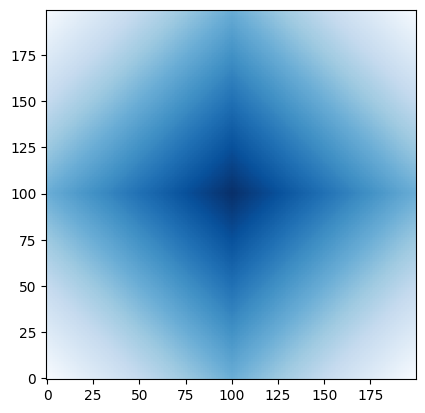

In [427]:
plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')

# 2. Apply Alive Thresholding

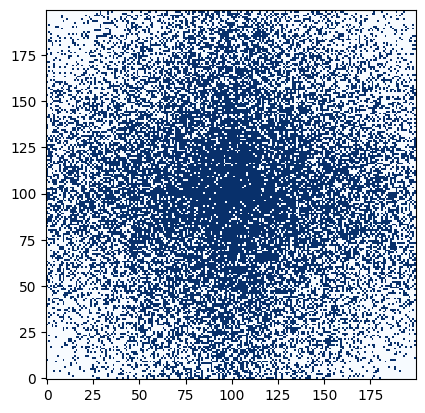

In [428]:
def alive_threshold(grid):
    for y in range(SIZE):
        for x in range(SIZE):
            if random.random() < grid[y, x]:
                grid[y, x] = 1
            else:
                grid[y, x] = 0
    
    return grid

grid = alive_threshold(grid)

plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')

# 3. Blur

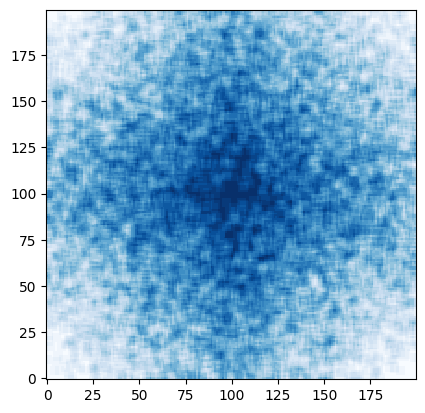

In [429]:
def get_neighbours(grid, x, y, offset=2):
    neighbours = []
    for n_x in range(x-offset, x+offset+1):
        for n_y in range(y-offset, y+offset+1):
            if n_x >= 0 and n_x < SIZE and n_y >= 0 and n_y < SIZE:
                neighbours.append(grid[n_y, n_x])
    
    return neighbours

def blur(grid):
    new_grid = np.zeros(shape=(SIZE, SIZE))
    
    for y in range(SIZE):
        for x in range(SIZE):
            neighbours = get_neighbours(grid, x, y)
            new_grid[y, x] = sum(neighbours) / len(neighbours)
            
    return new_grid

grid = blur(grid)

plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')

# 4. Blur Threshold

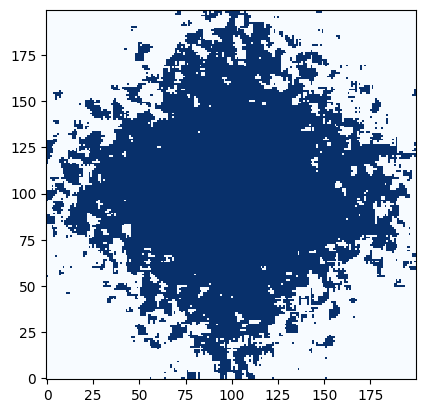

In [430]:
def blur_threshold(grid, threshold=0.5):
    for y in range(SIZE):
        for x in range(SIZE):
            if grid[y, x] > threshold:
                grid[y, x] = 1
            else:
                grid[y, x] = 0
            
    return grid

grid = blur_threshold(grid)

plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')

# 5. Smooth

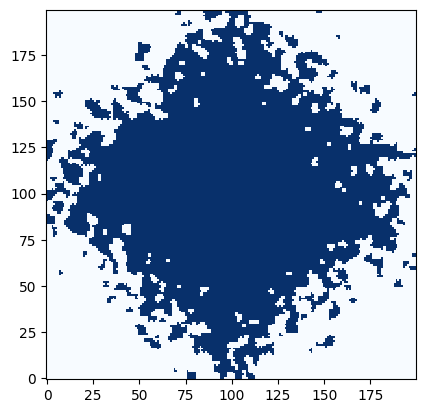

In [431]:
def smooth(grid, iterations=5):
    for _ in range(iterations):
        for y in range(SIZE):
            for x in range(SIZE):
                neighbours = get_neighbours(grid, x, y, offset=1)
                
                if grid[y, x] == 1:
                    # Cell is alive, check if it should die
                    if sum(neighbours) < 3:
                        grid[y, x] = 0
                        
                else:
                    # Cell is dead, check if it should come alive
                    if sum(neighbours) > 4:
                        grid[y, x] = 1
            
    return grid

grid = smooth(grid)

plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')